In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = {
    'Matière': ['Math', 'Musique', 'Français'],
    '1': [6, 6, 2],
    '2': [1, 1, 6],
    '3': [4, 4, 5],
    '4': [5, 5, 3],
    '5': [3, 3, 4],
    '6': [2, 2, 1],
    '7': [9, 9, 8],
    '8': [7, 7, 9],
    '9': [8, 8, 7],
    '10': [10, 10, 10],
    '11': [11, 11, 11]
}

df = pd.DataFrame(data)

X = df.iloc[:, 1:].values.astype(np.float64)
X = X.T

df

,Matière,1,2,3,4,5,6,7,8,9,10,11
0,Math,6,1,4,5,3,2,9,7,8,10,11
1,Musique,6,1,4,5,3,2,9,7,8,10,11
2,Français,2,6,5,3,4,1,8,9,7,10,11


In [25]:
n = X.shape[0]

In [26]:
D = np.diag([1/n for i in range(n)])

In [27]:
g = X.T.dot(D).dot(np.ones((n, 1)))

g

array([[6.],
       [6.],
       [6.]])

In [28]:
Y = X - np.ones((n, 1)).dot(g.T)

Y

array([[ 0.,  0., -4.],
       [-5., -5.,  0.],
       [-2., -2., -1.],
       [-1., -1., -3.],
       [-3., -3., -2.],
       [-4., -4., -5.],
       [ 3.,  3.,  2.],
       [ 1.,  1.,  3.],
       [ 2.,  2.,  1.],
       [ 4.,  4.,  4.],
       [ 5.,  5.,  5.]])

In [29]:
S2 = Y.T.dot(D).dot(Y)

M = np.diag(np.diag(1 / S2))

S2M = S2.dot(M)

lambdas, U = np.linalg.eig(S2M)

indices_posi = lambdas > 0
lambdas = lambdas[indices_posi]
U = U[:, indices_posi]


normesU = np.sqrt(np.diag(U.T.dot(M).dot(U))).reshape((U.shape[1], 1))
xx = np.ones((U.shape[0], 1)).dot(normesU.T)
U = U/xx

indices_tri = np.argsort(lambdas)[::-1]
lambdas = lambdas[indices_tri]
U = U[:, indices_tri]

CP = Y.dot(M).dot(U)

CP

array([[ 0.67864787, -1.06744417],
       [ 1.88699253,  1.19969128],
       [ 0.92445898,  0.21301547],
       [ 0.88638441, -0.56064487],
       [ 1.47151946,  0.18609268],
       [ 2.35790387, -0.37455219],
       [-1.47151946, -0.18609268],
       [-0.88638441,  0.56064487],
       [-0.92445898, -0.21301547],
       [-2.1882419 ,  0.10769115],
       [-2.73530238,  0.13461393]])

In [30]:
lamdba05 = np.diag(np.sqrt(lambdas))

lambdainv05 =  np.diag(np.sqrt(1 / lambdas))

CPV = U.dot(lamdba05)

CPV

array([[-3.08823015, -0.68031943],
       [-3.08823015, -0.68031943],
       [-2.77666814,  1.51331227]])

In [31]:
I = lambdas[0:2].sum() / lambdas.sum() * 100

print(f"{I}%")

100.0%


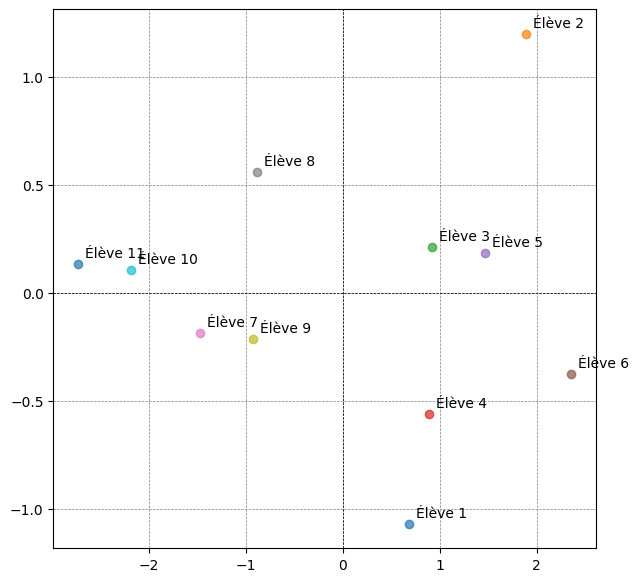

In [32]:
plt.figure(figsize=(7, 7))

for i in range(n):
    plt.scatter(CP[i, 0], CP[i, 1], alpha=0.7)
    plt.annotate(f'Élève {i+1}', 
                 (CP[i, 0], CP[i, 1]),
                 xytext=(5, 5), 
                 textcoords='offset points')

plt.grid(True, lw=0.5, ls='--', color='gray')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.show()

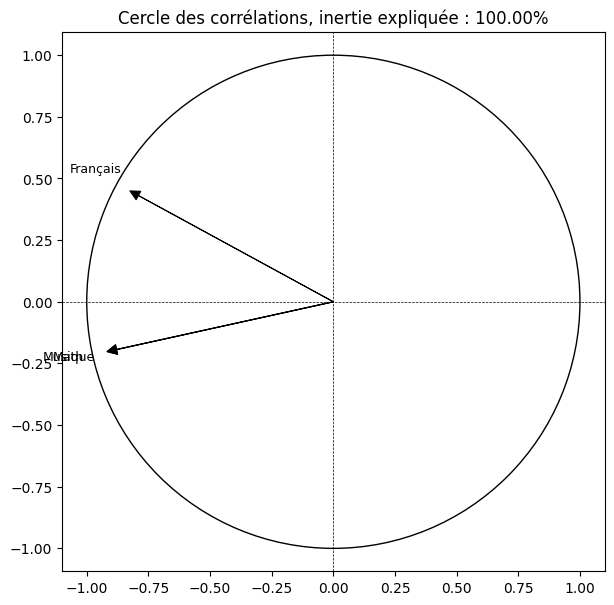

In [33]:
plt.figure(figsize=(7, 7))

# Dessiner le cercle unitaire
cercle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(cercle)

# CPV contient les coordonnées des matières
matieres = df.iloc[:, 0].values
for i, matiere in enumerate(matieres):
    # Normaliser pour le cercle
    x, y = CPV[i, 0], CPV[i, 1]
    norme = np.sqrt(x**2 + y**2)
    x_norm, y_norm = x/norme, y/norme
    
    plt.arrow(0, 0, x_norm*0.9, y_norm*0.9, head_width=0.04, head_length=0.04, color='black', linewidth=0.7)
    plt.text(x_norm*1.1, y_norm*1.1, matiere, 
             fontsize=9, ha='center')

plt.title(f'Cercle des corrélations, inertie expliquée : {I:.2f}%')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.show()